In [2]:
!pip install transformers seaborn matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 99.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 30.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 118.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.5 MB/s eta 0:00:00


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re
from transformers import TFAutoModelForSequenceClassification

In [4]:
import sys
import csv
maxInt = sys.maxsize

while True:
    # decrease the maxInt value by factor 10 
    # as long as the OverflowError occurs.

    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df_init = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/wagon/books_processed_top60.csv', engine="python",error_bad_lines=False)
df_init

<ipython-input-6-c10f64be1f5f>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df_init = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/wagon/books_processed_top60.csv', engine="python",error_bad_lines=False)


,Author,Book
0,Twain Mark,﻿The Project Gutenberg EBook of Chapters from ...
1,Ebers Georg,"﻿The Project Gutenberg EBook Margery, by Georg..."
2,Motley John Lothrop,﻿The Project Gutenberg EBook The Life of John ...
3,Warner Charles Dudley,"﻿The Project Gutenberg EBook of England, by Ch..."
4,Ebers Georg,﻿The Project Gutenberg EBook In The Fire Of Th...
...,...,...
959,Warner Charles Dudley,"﻿The Project Gutenberg EBook of As We Go, by C..."
960,Ebers Georg,﻿The Project Gutenberg EBook A Word Only A Wor...
961,Montaigne Michel de,﻿The Project Gutenberg Etext of Quotations fro...
962,Motley John Lothrop,﻿The Project Gutenberg EBook of The Life of Jo...


In [7]:

# Function to split the text into chunks of 512 characters
def split_text(text):
    return [text[i:i+512] for i in range(0, len(text), 512)]

# Create an empty list to store the chunks
chunks_list = []

# Iterate over each row in the original DataFrame
for index, row in df_init.iterrows():
    author = row['Author']
    book = row['Book']
    
    # Split the book text into chunks of 512 characters
    chunks = split_text(book)
    
    # Create a DataFrame with author and book chunks
    chunk_df = pd.DataFrame({'Author': author, 'Book': chunks})
    
    # Append the chunk DataFrame to the list
    chunks_list.append(chunk_df)

# Concatenate all the chunk DataFrames into a new DataFrame
new_df = pd.concat(chunks_list, ignore_index=True)

# Print the new DataFrame
print(new_df)


                       Author  \
0                  Twain Mark   
1                  Twain Mark   
2                  Twain Mark   
3                  Twain Mark   
4                  Twain Mark   
...                       ...   
1090862  Shelley Percy Bysshe   
1090863  Shelley Percy Bysshe   
1090864  Shelley Percy Bysshe   
1090865  Shelley Percy Bysshe   
1090866  Shelley Percy Bysshe   

                                                      Book  
0        ﻿The Project Gutenberg EBook of Chapters from ...  
1        MY AUTOBIOGRAPHY ***\n\n\n\n\nProduced by Bets...  
2        ; but, after leaving "Pier No. 70," he conclud...  
3        shed, after my death, and I also intend\nthat ...  
4        hese episodes are of a\nsort which he is famil...  
...                                                    ...  
1090862  ties and charitable donations in all 50 states...  
1090863  t the solicitation requirements, we know of no...  
1090864  uding checks, online payments and credit card

In [ ]:
def chunkify()

In [8]:
new_df


,Author,Book
0,Twain Mark,﻿The Project Gutenberg EBook of Chapters from ...
1,Twain Mark,MY AUTOBIOGRAPHY ***\n\n\n\n\nProduced by Bets...
2,Twain Mark,"; but, after leaving ""Pier No. 70,"" he conclud..."
3,Twain Mark,"shed, after my death, and I also intend\nthat ..."
4,Twain Mark,hese episodes are of a\nsort which he is famil...
...,...,...
1090862,Shelley Percy Bysshe,ties and charitable donations in all 50 states...
1090863,Shelley Percy Bysshe,"t the solicitation requirements, we know of no..."
1090864,Shelley Percy Bysshe,"uding checks, online payments and credit card ..."
1090865,Shelley Percy Bysshe,"rom several printed\neditions, all of which ar..."


In [9]:
def strip_html(text):
    clean = re.compile('<.*?>')
    return re.sub(clean, '', text)
def clean_special_chars(text):
    clean = re.sub(r'[\n\r\t]', '', text)
    return clean
new_df['Book'] = new_df['Book'].apply(strip_html)
new_df['Book'] = new_df['Book'].apply(clean_special_chars)

In [10]:
new_df

,Author,Book
0,Twain Mark,﻿The Project Gutenberg EBook of Chapters from ...
1,Twain Mark,"MY AUTOBIOGRAPHY ***Produced by Betsie Bush, C..."
2,Twain Mark,"; but, after leaving ""Pier No. 70,"" he conclud..."
3,Twain Mark,"shed, after my death, and I also intendthat it..."
4,Twain Mark,hese episodes are of asort which he is familia...
...,...,...
1090862,Shelley Percy Bysshe,ties and charitable donations in all 50 states...
1090863,Shelley Percy Bysshe,"t the solicitation requirements, we know of no..."
1090864,Shelley Percy Bysshe,"uding checks, online payments and credit card ..."
1090865,Shelley Percy Bysshe,"rom several printededitions, all of which are ..."


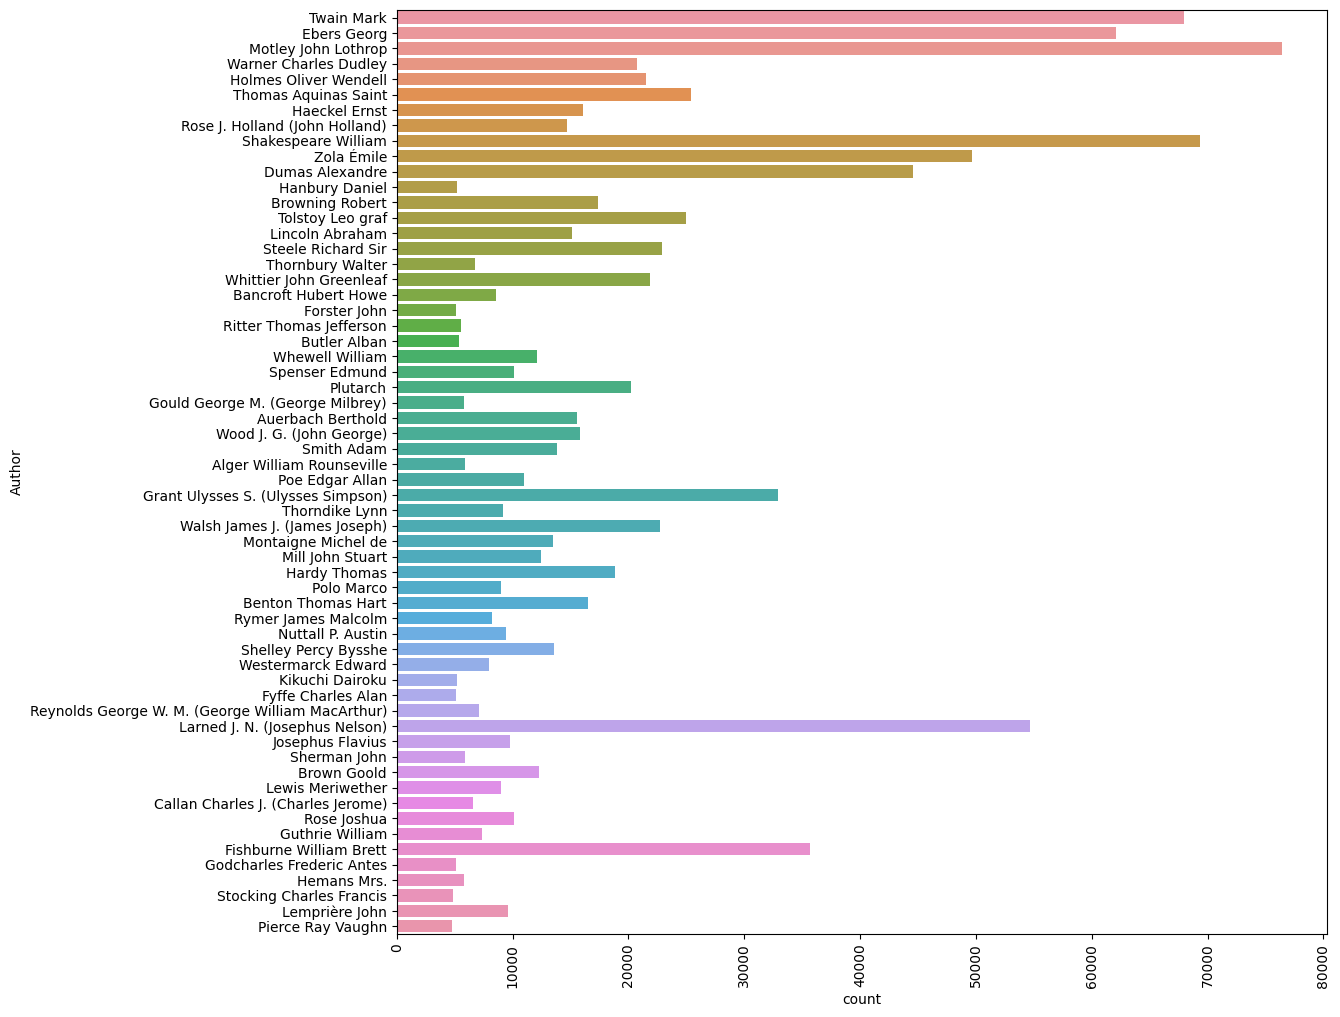

In [11]:
# plot the distribution of the number of chunks per author
plt.figure(figsize=(12, 12))
sns.countplot(y='Author', data=new_df)
plt.xticks(rotation=90)
plt.show()

In [12]:
new_df['Author'].value_counts().head(40)

Motley John Lothrop                   76469
Shakespeare William                   69387
Twain Mark                            67956
Ebers Georg                           62129
Larned J. N. (Josephus Nelson)        54654
Zola Émile                            49653
Dumas Alexandre                       44564
Fishburne William Brett               35685
Grant Ulysses S. (Ulysses Simpson)    32904
Thomas Aquinas Saint                  25371
Tolstoy Leo graf                      24950
Steele Richard Sir                    22936
Walsh James J. (James Joseph)         22709
Whittier John Greenleaf               21837
Holmes Oliver Wendell                 21517
Warner Charles Dudley                 20740
Plutarch                              20190
Hardy Thomas                          18849
Browning Robert                       17411
Benton Thomas Hart                    16500
Haeckel Ernst                         16114
Wood J. G. (John George)              15831
Auerbach Berthold               

In [13]:
# store the top 40 in list 
top40 = new_df['Author'].value_counts().head(40).index.tolist()
top40

['Motley John Lothrop',
 'Shakespeare William',
 'Twain Mark',
 'Ebers Georg',
 'Larned J. N. (Josephus Nelson)',
 'Zola Émile',
 'Dumas Alexandre',
 'Fishburne William Brett',
 'Grant Ulysses S. (Ulysses Simpson)',
 'Thomas Aquinas Saint',
 'Tolstoy Leo graf',
 'Steele Richard Sir',
 'Walsh James J. (James Joseph)',
 'Whittier John Greenleaf',
 'Holmes Oliver Wendell',
 'Warner Charles Dudley',
 'Plutarch',
 'Hardy Thomas',
 'Browning Robert',
 'Benton Thomas Hart',
 'Haeckel Ernst',
 'Wood J. G. (John George)',
 'Auerbach Berthold',
 'Lincoln Abraham',
 'Rose J. Holland (John Holland)',
 'Smith Adam',
 'Shelley Percy Bysshe',
 'Montaigne Michel de',
 'Mill John Stuart',
 'Brown Goold',
 'Whewell William',
 'Poe Edgar Allan',
 'Rose Joshua',
 'Spenser Edmund',
 'Josephus Flavius',
 'Lemprière John',
 'Nuttall P. Austin',
 'Thorndike Lynn',
 'Polo Marco',
 'Lewis Meriwether']

In [14]:
# let's keep the top40 
new_df = new_df[new_df['Author'].isin(top40)]
new_df

,Author,Book
0,Twain Mark,﻿The Project Gutenberg EBook of Chapters from ...
1,Twain Mark,"MY AUTOBIOGRAPHY ***Produced by Betsie Bush, C..."
2,Twain Mark,"; but, after leaving ""Pier No. 70,"" he conclud..."
3,Twain Mark,"shed, after my death, and I also intendthat it..."
4,Twain Mark,hese episodes are of asort which he is familia...
...,...,...
1090862,Shelley Percy Bysshe,ties and charitable donations in all 50 states...
1090863,Shelley Percy Bysshe,"t the solicitation requirements, we know of no..."
1090864,Shelley Percy Bysshe,"uding checks, online payments and credit card ..."
1090865,Shelley Percy Bysshe,"rom several printededitions, all of which are ..."


In [15]:
# pad the chunks with spaces to make them all 512 characters long
new_df['Book'] = new_df['Book'].apply(lambda x: x.ljust(512))
new_df

<ipython-input-15-40d00810ee65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Book'] = new_df['Book'].apply(lambda x: x.ljust(512))


,Author,Book
0,Twain Mark,﻿The Project Gutenberg EBook of Chapters from ...
1,Twain Mark,"MY AUTOBIOGRAPHY ***Produced by Betsie Bush, C..."
2,Twain Mark,"; but, after leaving ""Pier No. 70,"" he conclud..."
3,Twain Mark,"shed, after my death, and I also intendthat it..."
4,Twain Mark,hese episodes are of asort which he is familia...
...,...,...
1090862,Shelley Percy Bysshe,ties and charitable donations in all 50 states...
1090863,Shelley Percy Bysshe,"t the solicitation requirements, we know of no..."
1090864,Shelley Percy Bysshe,"uding checks, online payments and credit card ..."
1090865,Shelley Percy Bysshe,"rom several printededitions, all of which are ..."


In [16]:
new_df['Book'].apply(len).min(), new_df['Book'].apply(len).max()

(512, 512)

In [17]:
# keep the same amount of chunks per author
amount_per_author = new_df['Author'].value_counts().min()
amount_per_author

8967

In [18]:
new_df = new_df.groupby('Author').head(amount_per_author)
new_df

,Author,Book
0,Twain Mark,﻿The Project Gutenberg EBook of Chapters from ...
1,Twain Mark,"MY AUTOBIOGRAPHY ***Produced by Betsie Bush, C..."
2,Twain Mark,"; but, after leaving ""Pier No. 70,"" he conclud..."
3,Twain Mark,"shed, after my death, and I also intendthat it..."
4,Twain Mark,hese episodes are of asort which he is familia...
...,...,...
1021500,Poe Edgar Allan,of all the little squazes that I got in ret...
1021501,Poe Edgar Allan,"ehould, jist then all at once, the consat..."
1021502,Poe Edgar Allan,"r-di-dauns,” said I, as purlite as iver y..."
1021503,Poe Edgar Allan,"you, Sir Pathrick,” it said as plain as i..."


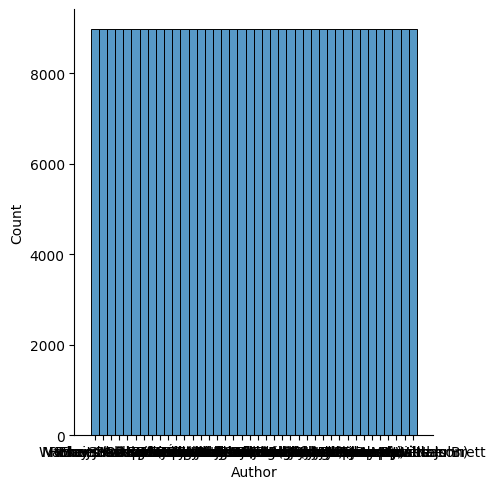

In [19]:
sns.displot(new_df['Author'])

In [20]:
# Prepare the data 

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(new_df, test_size=0.2, random_state=42, shuffle=True)
df_train, df_test

(                                    Author  \
 66521                   Steele Richard Sir   
 286457                  Benton Thomas Hart   
 286668                  Benton Thomas Hart   
 255063                    Tolstoy Leo graf   
 167240  Grant Ulysses S. (Ulysses Simpson)   
 ...                                    ...   
 168135  Grant Ulysses S. (Ulysses Simpson)   
 526893                         Brown Goold   
 186285               Holmes Oliver Wendell   
 214225                   Auerbach Berthold   
 170214  Grant Ulysses S. (Ulysses Simpson)   
 
                                                      Book  
 66521    hisDiscourse upon Epick Poem, takes occasion ...  
 286457  lf was the author of theproposition made in th...  
 286668  and when the immense aid given it by the feder...  
 255063  ed byU.S. federal laws and your state's laws.T...  
 167240  tate from rebel thraldom, forecasting in his s...  
 ...                                                   ...  
 168135

In [21]:
# load tokenizer and tokenize data
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

# convert to list of str
book_texts = df_train['Book'].tolist()

# Tokenize the data
tokenized_data = tokenizer(book_texts, return_tensors="np", padding=True)

# Tokenizer returns a BatchEncoding, but we convert that to a dict for Keras
tokenized_data = dict(tokenized_data)

In [22]:
# get the labels
labels = df_train['Author'].tolist()

# convert labels to nparray
labels_text = np.array(labels)

# apply label encoding to labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
labels = le.fit_transform(labels_text)
labels = np.array(labels)
labels

labels_clean = le.inverse_transform(labels)


In [23]:
labels_clean, labels

(array(['Steele Richard Sir', 'Benton Thomas Hart', 'Benton Thomas Hart',
        ..., 'Holmes Oliver Wendell', 'Auerbach Berthold',
        'Grant Ulysses S. (Ulysses Simpson)'], dtype='<U34'),
 array([29,  1,  1, ..., 10,  0,  7]))

In [64]:
from transformers import TFAutoModelForSequenceClassification
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers


# Load and compile our model
model = TFAutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=40)

# Set the classifier layer to be trainable
model.classifier.trainable = True
# Make the BERT layers non-trainable
for layer in model.layers:
    if "bert" in layer.name:
        layer.trainable = False
  
# Set the classifier layer and the dense layer before it to be trainable
model.classifier.trainable = True


# Lower learning rates are often better for fine-tuning transformers
model.compile(optimizer=Adam(3e-5), metrics=['accuracy'])  # No loss argument!

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [65]:
model.summary()

Model: "tf_bert_for_sequence_classification_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  108310272 
                                                                 
 dropout_873 (Dropout)       multiple                  0         
                                                                 
 classifier (Dense)          multiple                  30760     
                                                                 
Total params: 108,341,032
Trainable params: 30,760
Non-trainable params: 108,310,272
_________________________________________________________________


Model: "tf_bert_for_sequence_classification_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
=================================================================
 bert (TFBertMainLayer)      multiple                  108310272 
                                                                 
 dropout_873 (Dropout)       multiple                  0         
                                                                 
 classifier (Dense)          multiple                  30760     
                                                                 
=================================================================
Total params: 108,341,032
Trainable params: 30,760
Non-trainable params: 108,310,272


In [ ]:
# tf.data.dataset # pour eviter de tout loader en ram 
# Adafactor
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(tokenized_data, labels, batch_size=32, epochs=100, verbose=1, callbacks=[es], validation_split=0.2)

Epoch 1/100
7174/7174 [==============================] - 1273s 175ms/step - loss: 3.4742 - accuracy: 0.1075 - val_loss: 3.3130 - val_accuracy: 0.1855
Epoch 2/100
7174/7174 [==============================] - 1256s 175ms/step - loss: 3.2281 - accuracy: 0.1869 - val_loss: 3.1192 - val_accuracy: 0.2430
Epoch 3/100
7174/7174 [==============================] - 1255s 175ms/step - loss: 3.0753 - accuracy: 0.2288 - val_loss: 2.9891 - val_accuracy: 0.2766
Epoch 4/100
7174/7174 [==============================] - 1256s 175ms/step - loss: 2.9660 - accuracy: 0.2558 - val_loss: 2.8943 - val_accuracy: 0.2905
Epoch 5/100
7174/7174 [==============================] - 1256s 175ms/step - loss: 2.8851 - accuracy: 0.2742 - val_loss: 2.8095 - val_accuracy: 0.3277
Epoch 6/100
7174/7174 [==============================] - 1255s 175ms/step - loss: 2.8172 - accuracy: 0.2882 - val_loss: 2.7463 - val_accuracy: 0.3319
Epoch 7/100
7174/7174 [==============================] - 1255s 175ms/step - loss: 2.7600 - accuracy:

Epoch 1/100
7174/7174 [==============================] - 1273s 175ms/step - loss: 3.4742 - accuracy: 0.1075 - val_loss: 3.3130 - val_accuracy: 0.1855
Epoch 2/100
7174/7174 [==============================] - 1256s 175ms/step - loss: 3.2281 - accuracy: 0.1869 - val_loss: 3.1192 - val_accuracy: 0.2430
Epoch 3/100
7174/7174 [==============================] - 1255s 175ms/step - loss: 3.0753 - accuracy: 0.2288 - val_loss: 2.9891 - val_accuracy: 0.2766
Epoch 4/100
7174/7174 [==============================] - 1256s 175ms/step - loss: 2.9660 - accuracy: 0.2558 - val_loss: 2.8943 - val_accuracy: 0.2905
Epoch 5/100
7174/7174 [==============================] - 1256s 175ms/step - loss: 2.8851 - accuracy: 0.2742 - val_loss: 2.8095 - val_accuracy: 0.3277
Epoch 6/100
7174/7174 [==============================] - 1255s 175ms/step - loss: 2.8172 - accuracy: 0.2882 - val_loss: 2.7463 - val_accuracy: 0.3319
Epoch 7/100
7174/7174 [==============================] - 1255s 175ms/step - loss: 2.7600 - accuracy: 0.3021 - val_loss: 2.6893 - val_accuracy: 0.3562
Epoch 8/100
7174/7174 [==============================] - 1255s 175ms/step - loss: 2.7086 - accuracy: 0.3137 - val_loss: 2.6407 - val_accuracy: 0.3587
Epoch 9/100
7174/7174 [==============================] - 1252s 175ms/step - loss: 2.6661 - accuracy: 0.3222 - val_loss: 2.5957 - val_accuracy: 0.3774
Epoch 10/100
7174/7174 [==============================] - 1251s 174ms/step - loss: 2.6277 - accuracy: 0.3297 - val_loss: 2.5555 - val_accuracy: 0.3777
Epoch 11/100
7174/7174 [==============================] - 1252s 174ms/step - loss: 2.5938 - accuracy: 0.3371 - val_loss: 2.5201 - val_accuracy: 0.3916
Epoch 12/100
7174/7174 [==============================] - 1248s 174ms/step - loss: 2.5623 - accuracy: 0.3436 - val_loss: 2.4856 - val_accuracy: 0.3887
Epoch 13/100
7174/7174 [==============================] - 1249s 174ms/step - loss: 2.5320 - accuracy: 0.3515 - val_loss: 2.4543 - val_accuracy: 0.4064
Epoch 14/100
7174/7174 [==============================] - 1252s 175ms/step - loss: 2.5060 - accuracy: 0.3573 - val_loss: 2.4292 - val_accuracy: 0.4039
Epoch 15/100
7174/7174 [==============================] - 1254s 175ms/step - loss: 2.4822 - accuracy: 0.3620 - val_loss: 2.4010 - val_accuracy: 0.4119
Epoch 16/100
7174/7174 [==============================] - 1250s 174ms/step - loss: 2.4620 - accuracy: 0.3641 - val_loss: 2.3753 - val_accuracy: 0.4213
Epoch 17/100
7174/7174 [==============================] - 1250s 174ms/step - loss: 2.4412 - accuracy: 0.3687 - val_loss: 2.3549 - val_accuracy: 0.4247
Epoch 18/100
7174/7174 [==============================] - 1249s 174ms/step - loss: 2.4242 - accuracy: 0.3728 - val_loss: 2.3312 - val_accuracy: 0.4203
Epoch 19/100
7174/7174 [==============================] - 1252s 175ms/step - loss: 2.4035 - accuracy: 0.3755 - val_loss: 2.3154 - val_accuracy: 0.4302
Epoch 20/100
7174/7174 [==============================] - 1249s 174ms/step - loss: 2.3894 - accuracy: 0.3781 - val_loss: 2.2915 - val_accuracy: 0.4363
Epoch 21/100
7174/7174 [==============================] - 1250s 174ms/step - loss: 2.3740 - accuracy: 0.3815 - val_loss: 2.2706 - val_accuracy: 0.4468
Epoch 22/100
7174/7174 [==============================] - 1250s 174ms/step - loss: 2.3582 - accuracy: 0.3842 - val_loss: 2.2592 - val_accuracy: 0.4444
Epoch 23/100
7174/7174 [==============================] - 1251s 174ms/step - loss: 2.3439 - accuracy: 0.3876 - val_loss: 2.2392 - val_accuracy: 0.4475
Epoch 24/100
5775/7174 [=======================>......] - ETA: 3:22 - loss: 2.3328 - accuracy: 0.3898


In [ ]:
# Save the model and tokenizer
model.save_pretrained('/content/drive/MyDrive/Colab Notebooks/wagon/gutenBERT_model')
tokenizer.save_pretrained('/content/drive/MyDrive/Colab Notebooks/wagon/gutenBERT_tokenizer')
